In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

# Zad
Wykonaj klasyfikację danych cifar10 za pomocą regresji logistycznej.

In [5]:
import keras
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


[0 1 2 3 4 5 6 7 8 9]


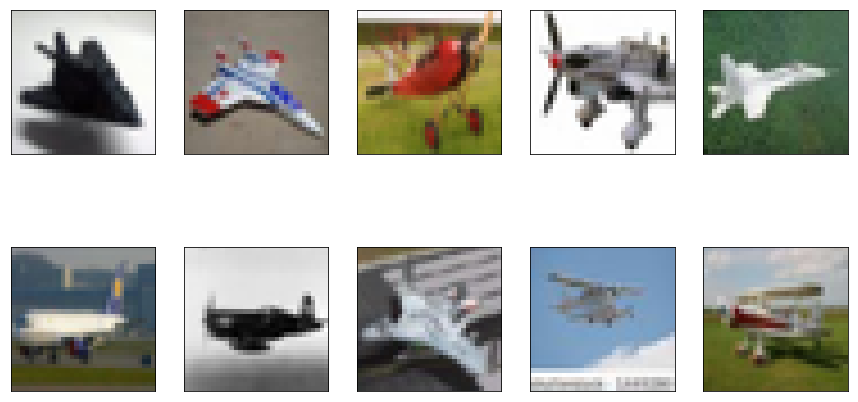

_________________________________


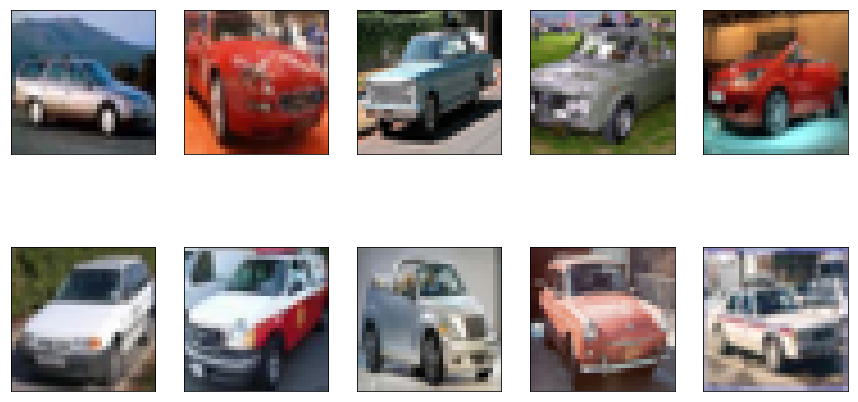

_________________________________


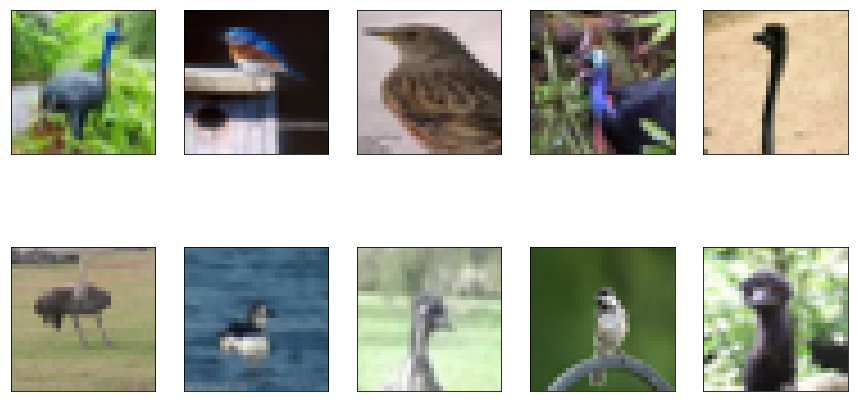

_________________________________


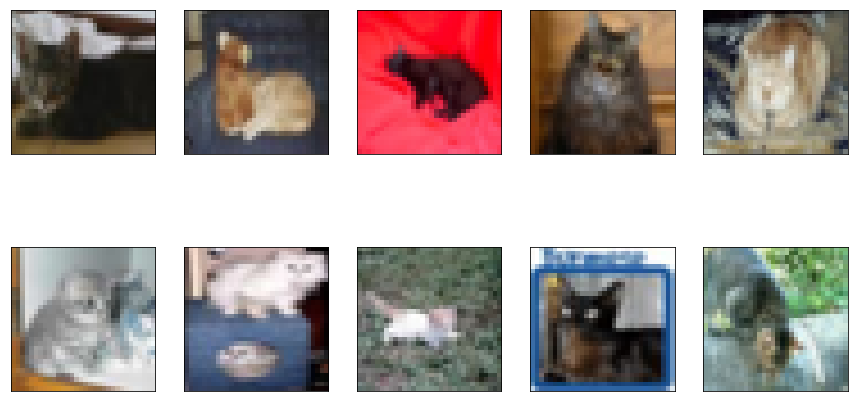

_________________________________


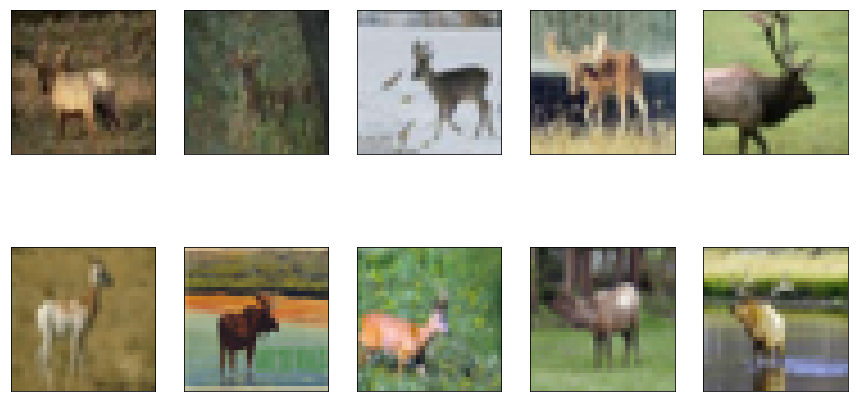

_________________________________


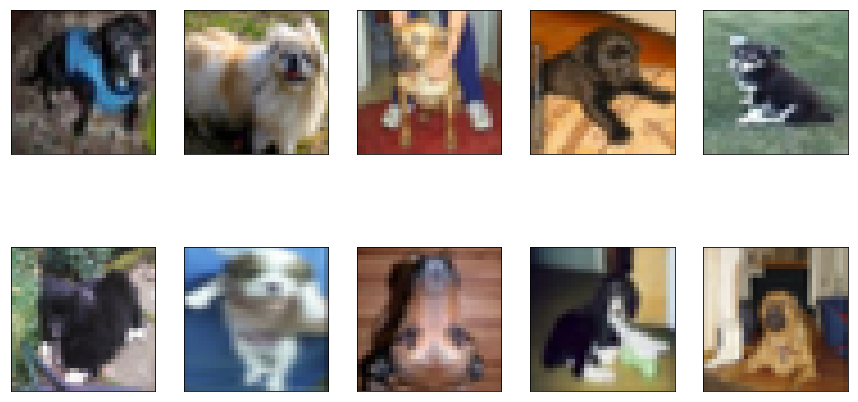

_________________________________


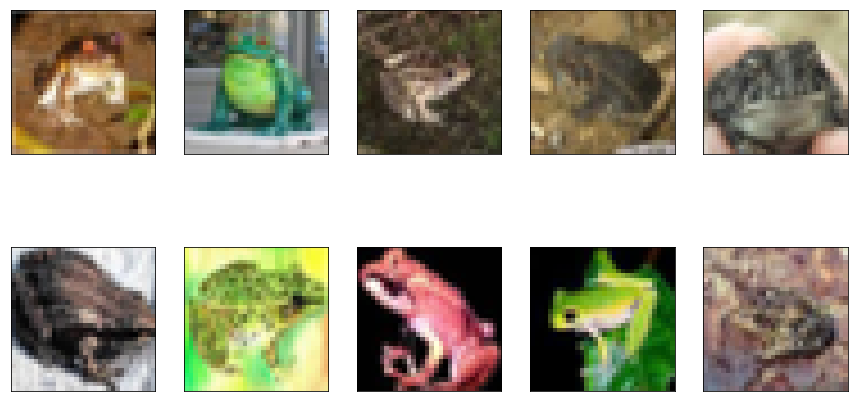

_________________________________


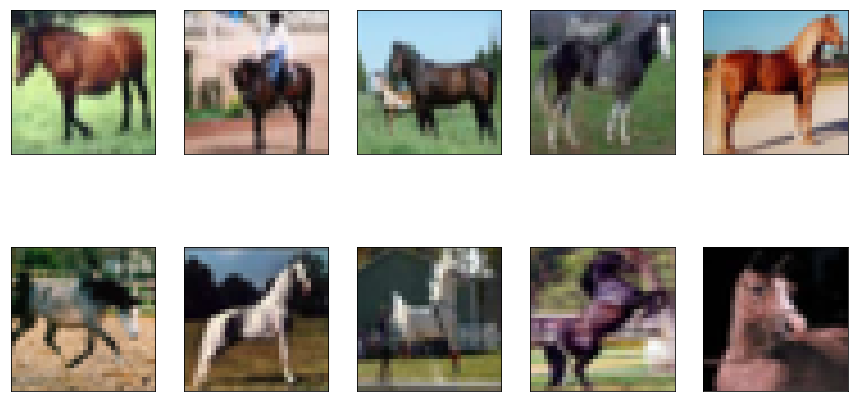

_________________________________


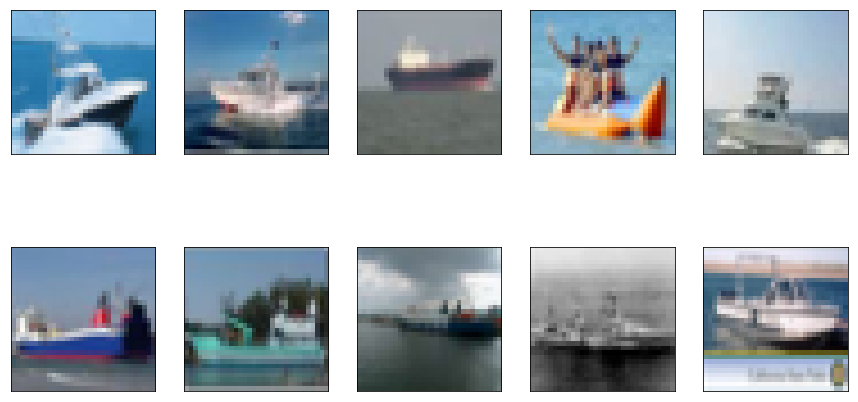

_________________________________


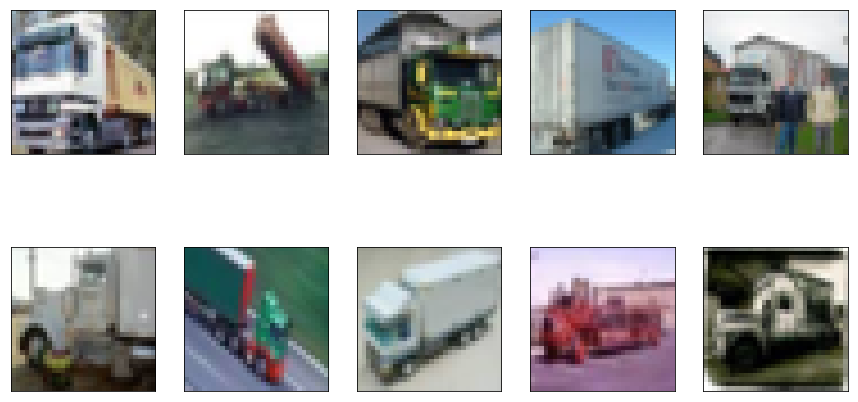

_________________________________


In [6]:
y = np.asarray(y_train, dtype=np.int32).reshape(-1)
print(np.unique(y))

for i in range(10):
    X_1 = x_train[y==i,:]
    fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
    for target, image, ax in zip(y, X_1, axes.ravel()):
        ax.imshow(image, cmap=plt.cm.gist_gray)
    plt.show() 
    print("_________________________________")

In [8]:
x_train = x_train.reshape(-1, 3*32*32)
x_test = x_test.reshape(-1, 3*32*32)

# Zad
Jeżeli nie zredukujesz wymiarów to będzie się liczyć bardzo długo (odradzam sprawdzanie).

In [9]:
# clf = LogisticRegression(random_state=42)
# clf.fit(X_train, y_train)
# from sklearn.metrics import f1_score
# f1_score(y_true = y_tes , y_pred = clf.predict(X_test))

# Zad
Wyznacz optymalną ilość współrzędnych w PCA


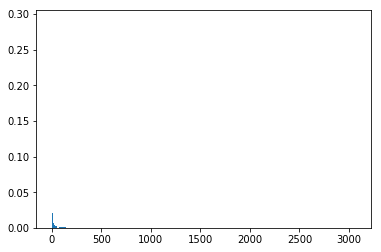

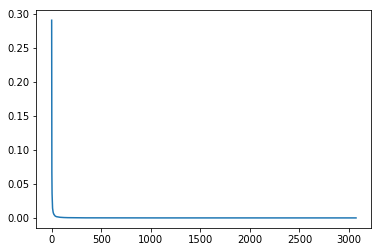

In [10]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)

plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
plt.show()

plt.plot(pca.explained_variance_ratio_)
plt.show()


# Zad
Zredukuj wymiar do **n_components=10** i wykonaj klasyfikację.

Jakie uzyskałeś **accuracy_score**

In [11]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
pca = PCA(n_components=10)
pca.fit(x_train)

x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

clf = LogisticRegression(random_state=42)
# learning an LR on the scaled training data
clf.fit(x_train_pca, y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
# scoring on the scaled test set
print("Scaled test set Accuracy: {:.2f}".format( metrics.accuracy_score( y_pred = clf.predict(x_test_pca), y_true = y_test)) )

Scaled test set Accuracy: 0.32


# Zad
Wykonaj analogiczne zadanie za pomoca: 

```python
from sklearn.pipeline import Pipeline
```

# Zad.

Narysuj zależność ilości wymiarów i miary Accuracy dla

**
n_components = 2,...,20
**

In [13]:
from sklearn.pipeline import Pipeline

accuracy_array = []

for i in range(1,20):
    pipe = Pipeline([
        ("pca", PCA(n_components=i)),
        ("LR", LogisticRegression(random_state=42))    
    ])

    pipe.fit(x_train, y_train)
    acc = metrics.accuracy_score( y_pred = pipe.predict(x_test), y_true = y_test)
    accuracy_array.append(acc)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

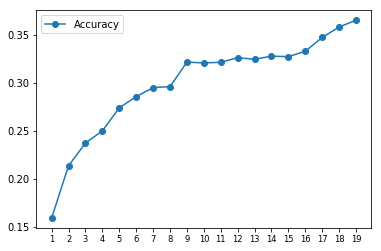

In [14]:
t=range(1,20)

plt.plot(accuracy_array, "o-", label="Accuracy")
plt.xticks(range(len(t)), t, size='small')
plt.legend()
plt.show()

# Zad
Wykonaj GridSearch po ilości komponentów do której redukujesz wymiar do redukcji.

Sprawdź

**
n_components = 2,...,20
**

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipe = Pipeline([
        ("scaler", StandardScaler()), 
        ("pca", PCA(n_components=i)),
        ("LR",  LogisticRegression(random_state=42))    
    ])

param_grid = {'scaler': [StandardScaler(), None],
            'pca__n_components': np.arange(1, 20)}

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=5, random_state=42)

grid = GridSearchCV(pipe, param_grid=param_grid, cv=kfold)
grid.fit(x_train, y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\Anaconda3\lib\site-packag

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\admin\Anaconda3\lib\site-packag

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=False),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=19, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('LR', LogisticRegression(C=1.0, class_weight=None, dual=F...lty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'scaler': [StandardScaler(copy=True, with_mean=True, with_std=True), None], 'pca__n_components': array([1, 2, 3, 4])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
print("Best parameters: ", grid.best_params_)
print("Test Accuracy: {:.2f}".format( metrics.accuracy_score( y_pred = grid.predict(x_test), y_true = y_test) ))

Best parameters:  {'pca__n_components': 4, 'scaler': None}
Test Accuracy: 0.25
